## 1. Write a function to solve a system of linear equations $AX = B$ using Gaussian elimination. Use it to solve the


In [2]:
import numpy as np 
A = np.array([[1, -2, 1], [2, 1, -3], [4, -7, 1]], dtype = float)
C = np.array([[1, 2, -1, 1], [-1, 1, 2, -1], [2, -1, 2, 2], [1, 1, -1, 2]], dtype = float)
x1 = np.array([6, 3, 14, 8], dtype = float)
x = np.array([0, 5, -1], dtype = float)
def GaussElimination(M, Y):
    
    n = len(Y)
    for i in range(n-1):
        for j in range(i+1, n):
            fac = M[j,i]/M[i,i]
            M[j,:]-=fac * M[i, :]
            Y[j] -= fac * Y[i]
    x = np.zeros((n))
    for j in range(n-1, -1, -1):
        x[j] = (Y[j] - np.dot(M[j, j+1:], x[j+1:]))/M[j, j]
        
    return x
print(GaussElimination(A, x))
print(GaussElimination(C, x1))

[3. 2. 1.]
[1. 2. 3. 4.]


## 2. Familiarization with scipy routines: repeat the above exercise using scipy.linalg.solve

In [9]:
from scipy.linalg import solve
print(solve(A, x))
print(solve(C, x1))

[3. 2. 1.]
[1. 2. 3. 4.]


## 3. Write a program to interpolate the following data using cubic spline interpolation

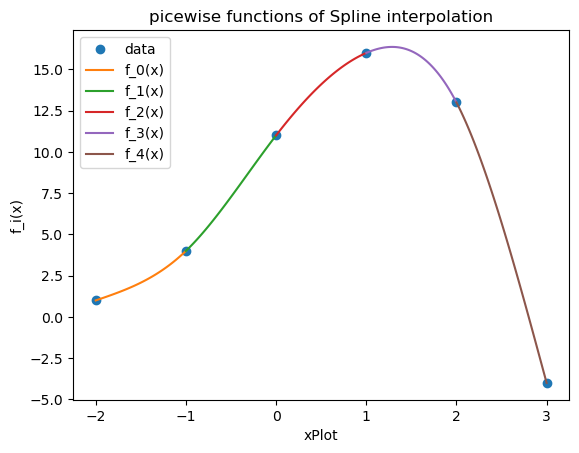

In [10]:
import numpy as np
import matplotlib.pyplot as plt
h0 = h1 = h2 = h3 = h4 = 1
b0 = 3
b1 = 7
b2 = 5
b3 = -3
b4 = -17

M = np.array([[1, 0, 0, 0, 0, 0],
[h0, 2*(h0+h1), h1, 0, 0, 0],
[0, h1, 2 * (h1 + h2), h2, 0, 0],
[0, 0, h2, 2 * (h3 + h2), h3, 0],
[0, 0, 0, h3, 2 * (h3 + h4), h4 ],
[0, 0, 0, 0, 0, 1]
], dtype = float)
x2 = np.array([0, 6*(b1 - b0), 6*(b2 - b1), 6*(b3 - b2), 6*(b4 - b3), 0], dtype = float)
#y = np.array()

z = GaussElimination(M, x2)
h = [h0, h1, h2, h3, h4]
xData = np.array([-2, -1, 0, 1, 2, 3])
yData = np.array([1, 4, 11, 16, 13, -4])


def Spline_interpolation(i, xData, x):
    return (z[i+1]* h[i]/6) * (x-xData[i]) ** 3 + (z[i] * h[i]/6) * (xData[i+1] - x) ** 3 + (yData[i+1]/h[i]-z[i+1] * h[i]/6) * (x-xData[i]) + (yData[i]/h[i] - (z[i] * h[i]/6)) * (xData[i+1] -x)

plt.plot(xData, yData, 'o', label='data')
for j in range(len(xData)-1):
    xPlot = np.linspace(xData[j], xData[j+1], 100)
    yPlot = Spline_interpolation(j, xData, xPlot)
    plt.plot(xPlot, yPlot, label = 'f_'+str(j)+'(x)')
    plt.xlabel('xPlot')
    plt.ylabel('f_i(x)')
    plt.title('picewise functions of Spline interpolation')
    plt.legend()

## 4. Compare the results obtained above using the routine scipy.interpolate.CubicSpline.

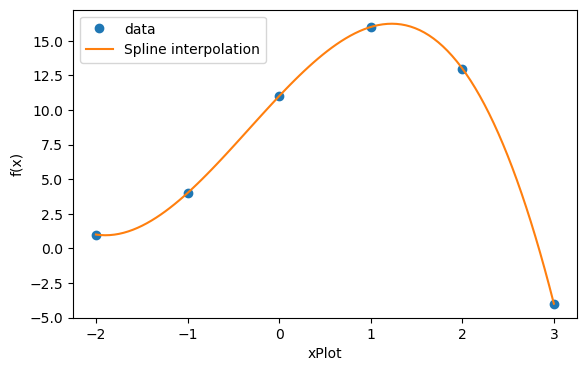

In [233]:
from scipy.interpolate import CubicSpline
x = np.array([-2, -1, 0, 1, 2, 3], dtype = float)
y = np.array([1, 4, 11, 16, 13, -4], dtype = float)
cs = CubicSpline(x, y)
xs = np.linspace(-2, 3, 100)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, cs(xs), label="Spline interpolation")
ax.set_xlabel('xPlot')
ax.set_ylabel('f(x)')
ax.legend()